## Summary of findings

"Mixed Breed" for dogs (\~73%) and "Domestic" breeds for cats (\~75.5%) make up the majority of breeds in the distribution. For pets with these breeds, it's likely that other factors, like color, size, etc., will be needed to differentiate between the pets.

It may be possible to group the remaining breeds into tiers of popularity, but there is a long tail of breed frequency for both dogs and cats, so grouping different breeds together based on popularity may not be very useful.

One additional observation is that there are some data lines that cover multipl

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
def ecdf(data):
    """Function to return coordinates to use for an ECDF"""
    
    x = np.sort(data)
    y = np.arange(1, len(x) + 1) / len(x)
    return x, y

In [3]:
train_zip = "../data/train.csv.zip"
train_df = pd.read_csv(train_zip, compression='zip')
train_df.head()

,Type,Name,Age,Breed1,Breed2,Gender,Color1,Color2,Color3,MaturitySize,...,Health,Quantity,Fee,State,RescuerID,VideoAmt,Description,PetID,PhotoAmt,AdoptionSpeed
0,2,Nibble,3,299,0,1,1,7,0,1,...,1,1,100,41326,8480853f516546f6cf33aa88cd76c379,0,Nibble is a 3+ month old ball of cuteness. He ...,86e1089a3,1.0,2
1,2,No Name Yet,1,265,0,1,1,2,0,2,...,1,1,0,41401,3082c7125d8fb66f7dd4bff4192c8b14,0,I just found it alone yesterday near my apartm...,6296e909a,2.0,0
2,1,Brisco,1,307,0,1,2,7,0,2,...,1,1,0,41326,fa90fa5b1ee11c86938398b60abc32cb,0,Their pregnant mother was dumped by her irresp...,3422e4906,7.0,3
3,1,Miko,4,307,0,2,1,2,0,2,...,1,1,150,41401,9238e4f44c71a75282e62f7136c6b240,0,"Good guard dog, very alert, active, obedience ...",5842f1ff5,8.0,2
4,1,Hunter,1,307,0,1,1,0,0,2,...,1,1,0,41326,95481e953f8aed9ec3d16fc4509537e8,0,This handsome yet cute boy is up for adoption....,850a43f90,3.0,2


In [4]:
breed_file = "../data/breed_labels.csv"
breed_df = pd.read_csv(breed_file)
breed_df.head()

,BreedID,Type,BreedName
0,1,1,Affenpinscher
1,2,1,Afghan Hound
2,3,1,Airedale Terrier
3,4,1,Akbash
4,5,1,Akita


In [18]:
breed_df.shape

(307, 3)

In [5]:
df = pd.merge(train_df, breed_df[["BreedID", "BreedName"]], how='left', left_on="Breed1", right_on="BreedID")
df = df.drop(["BreedID"], axis=1)
df = df.rename(columns={"BreedName": "BreedName1"})
df = pd.merge(df, breed_df[["BreedID", "BreedName"]], how='left', left_on="Breed2", right_on="BreedID")
df = df.drop(["BreedID"], axis=1)
df = df.rename(columns={"BreedName": "BreedName2"})
df['AllBreeds'] = df['BreedName1'] + "_" + df['BreedName2']
df.head()

,Type,Name,Age,Breed1,Breed2,Gender,Color1,Color2,Color3,MaturitySize,...,State,RescuerID,VideoAmt,Description,PetID,PhotoAmt,AdoptionSpeed,BreedName1,BreedName2,AllBreeds
0,2,Nibble,3,299,0,1,1,7,0,1,...,41326,8480853f516546f6cf33aa88cd76c379,0,Nibble is a 3+ month old ball of cuteness. He ...,86e1089a3,1.0,2,Tabby,NaN,NaN
1,2,No Name Yet,1,265,0,1,1,2,0,2,...,41401,3082c7125d8fb66f7dd4bff4192c8b14,0,I just found it alone yesterday near my apartm...,6296e909a,2.0,0,Domestic Medium Hair,NaN,NaN
2,1,Brisco,1,307,0,1,2,7,0,2,...,41326,fa90fa5b1ee11c86938398b60abc32cb,0,Their pregnant mother was dumped by her irresp...,3422e4906,7.0,3,Mixed Breed,NaN,NaN
3,1,Miko,4,307,0,2,1,2,0,2,...,41401,9238e4f44c71a75282e62f7136c6b240,0,"Good guard dog, very alert, active, obedience ...",5842f1ff5,8.0,2,Mixed Breed,NaN,NaN
4,1,Hunter,1,307,0,1,1,0,0,2,...,41326,95481e953f8aed9ec3d16fc4509537e8,0,This handsome yet cute boy is up for adoption....,850a43f90,3.0,2,Mixed Breed,NaN,NaN


In [20]:
df.columns

Index(['Type', 'Name', 'Age', 'Breed1', 'Breed2', 'Gender', 'Color1', 'Color2',
       'Color3', 'MaturitySize', 'FurLength', 'Vaccinated', 'Dewormed',
       'Sterilized', 'Health', 'Quantity', 'Fee', 'State', 'RescuerID',
       'VideoAmt', 'Description', 'PetID', 'PhotoAmt', 'AdoptionSpeed',
       'BreedName1', 'BreedName2', 'AllBreeds'],
      dtype='object')

In [12]:
df['Type'].value_counts()

1    8132
2    6861
Name: Type, dtype: int64

### Looking at Dog Breeds

Observation: We can see that "Mixed Breed" (ID 307) is by far the most common breed. ~73% of lines with dog entries are Mixed Breed.

In [75]:
sum_dogs = len(df.loc[df['Type'] == 1])
dog_breeds_df = df.loc[df['Type'] == 1, 'BreedName1'].value_counts().to_frame()
dog_breeds_df = dog_breeds_df.rename(columns={'BreedName1': 'cnt'})
dog_breeds_df.index.name='BreedName1'
dog_breeds_df['pct'] = 100 * (dog_breeds_df['cnt'] / sum_dogs)
dog_breeds_df.head(5)

,cnt,pct
BreedName1,,
Mixed Breed,5923,72.835711
Labrador Retriever,205,2.520905
Shih Tzu,189,2.324152
Poodle,167,2.053615
Terrier,161,1.979833


Observation: Looking at the frequency of breeds without the "Mixed Breed" dogs, there appears to be a few tiers of popularity amoung breeds.

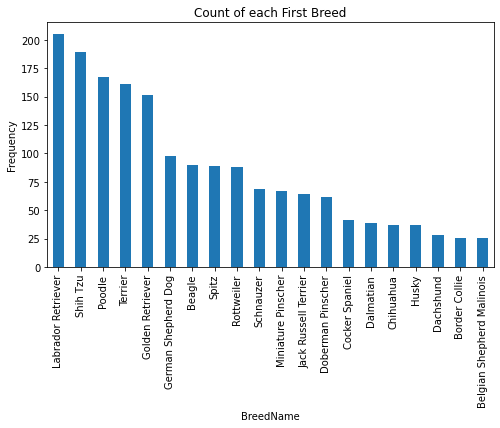

In [32]:
_ = df.loc[(df['Type'] == 1) & (df['Breed1'] != 307), 'BreedName1'].value_counts().head(20).plot(kind='bar',
                                    figsize=(8,4.5),
                                    title="Count of each First Breed")
_ = plt.xlabel("BreedName")
_ = plt.ylabel("Frequency")

**key observation: There are a set of rows that account for multiple dogs**

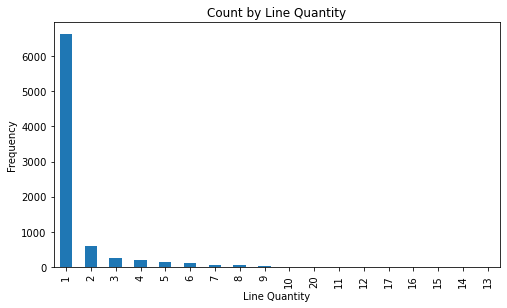

In [79]:
_ = df.loc[(df['Type'] == 1), 'Quantity'].value_counts().head(20).plot(kind='bar',
                                    figsize=(8,4.5),
                                    title="Count by Line Quantity")
_ = plt.xlabel("Line Quantity")
_ = plt.ylabel("Frequency")

Observation: The large majority of multi-quantity lines are puppies.

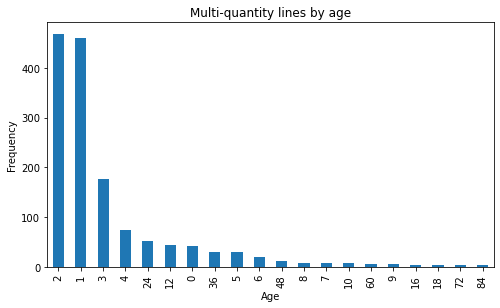

In [80]:
_ = df.loc[(df['Type'] == 1) & (df['Quantity'] != 1), 'Age'].value_counts().head(20).plot(kind='bar',
                                    figsize=(8,4.5),
                                    title="Multi-quantity lines by age")
_ = plt.xlabel("Age")
_ = plt.ylabel("Frequency")

Defining "puppies" as lines with the "Age" label <= 4, let's take a look at the breed breakdown. 

Observation: Lines with multiple dogs seem to follow the same pattern as the general population, most are Mixed Breed.

In [83]:
df.loc[(df['Type'] == 1) & (df['Quantity'] != 1) & (df['Age'] <= 4), 'BreedName1'].value_counts().head()

Mixed Breed           1101
Labrador Retriever      17
Terrier                 14
Spitz                   11
Rottweiler               6
Name: BreedName1, dtype: int64

### Looking at Cat Breeds

Obseration: Most cat breeds are some variety of "Domestic," totalling ~ 75.5% of all cats. There are a small number of other cat breeds that are common. This suggests a smaller set of popular breeds compared to dogs.

In [85]:
df.loc[df['Type'] == 2, 'BreedName1'].value_counts().head()

Domestic Short Hair     3634
Domestic Medium Hair    1258
Tabby                    342
Domestic Long Hair       296
Siamese                  264
Name: BreedName1, dtype: int64

In [86]:
sum_cats = len(df.loc[df['Type'] == 2])
cat_breeds_df = df.loc[df['Type'] == 2, 'BreedName1'].value_counts().to_frame()
cat_breeds_df = cat_breeds_df.rename(columns={'BreedName1': 'cnt'})
cat_breeds_df.index.name='BreedName1'
cat_breeds_df['pct'] = 100 * (cat_breeds_df['cnt'] / sum_cats)
cat_breeds_df.head(10)

,cnt,pct
BreedName1,,
Domestic Short Hair,3634,52.966040
Domestic Medium Hair,1258,18.335520
Tabby,342,4.984696
Domestic Long Hair,296,4.314240
Siamese,264,3.847836
Persian,221,3.221105
Calico,105,1.530389
American Shorthair,94,1.370063
Oriental Short Hair,73,1.063985


Comparing Domestic cat types by hair descripion and FurLength input.

Observation: Domestic Long Hairs are often labeled as 2-3 FurLength, Medium hairs usually have a FurLength of 2, and Short hairs usually have a FurLength of 1.

In [87]:
breed_df.loc[(breed_df['BreedName'] == 'Domestic Short Hair') | (breed_df['BreedName'] == 'Domestic Medium Hair') | (breed_df['BreedName'] == 'Domestic Long Hair')]

,BreedID,Type,BreedName
264,264,2,Domestic Long Hair
265,265,2,Domestic Medium Hair
266,266,2,Domestic Short Hair


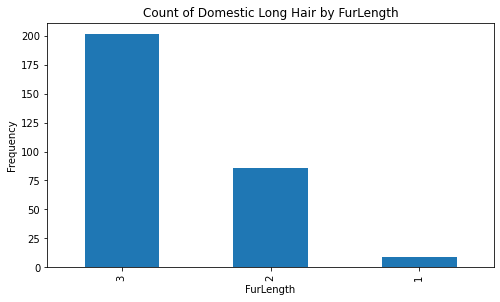

In [88]:
# domestic breeds vs hair reporting
_ = df.loc[(df['Type'] == 2) & (df['Breed1'] == 264), 'FurLength'].value_counts().head(20).plot(kind='bar',
                                    figsize=(8,4.5),
                                    title="Count of Domestic Long Hair by FurLength")
_ = plt.xlabel("FurLength")
_ = plt.ylabel("Frequency")

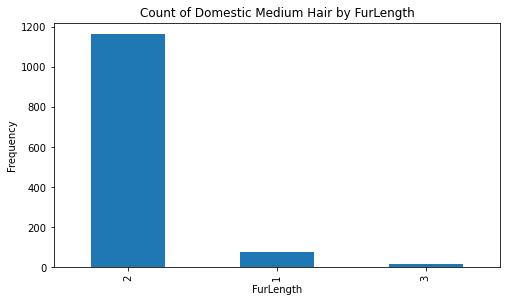

In [89]:
# Domestic breeds vs hair reporting
_ = df.loc[(df['Type'] == 2) & (df['Breed1'] == 265), 'FurLength'].value_counts().head(20).plot(kind='bar',
                                    figsize=(8,4.5),
                                    title="Count of Domestic Medium Hair by FurLength")
_ = plt.xlabel("FurLength")
_ = plt.ylabel("Frequency")

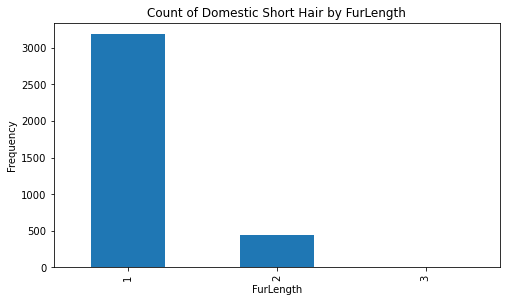

In [90]:
# Domestic breeds vs hair reporting
_ = df.loc[(df['Type'] == 2) & (df['Breed1'] == 266), 'FurLength'].value_counts().head(20).plot(kind='bar',
                                    figsize=(8,4.5),
                                    title="Count of Domestic Short Hair by FurLength")
_ = plt.xlabel("FurLength")
_ = plt.ylabel("Frequency")

Excluding domestic cat types, and mixed breed dog types, There seems to be a less even distribution of breed types. This could mean that there are a smaller number of popular cat breeds compared to popular dog breeds. So perhaps non-domestic cat breeds could be more meaningful, compared to non-mixed dog breeds.

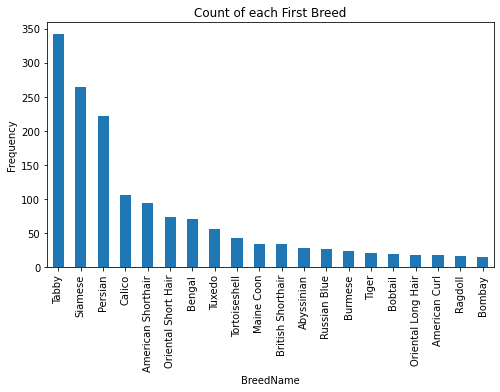

In [91]:
_ = df.loc[(df['Type'] == 2) & 
           (df['Breed1'] != 264) & (df['Breed1'] != 265) & (df['Breed1'] != 266),
           'BreedName1'].value_counts().head(20).plot(kind='bar',
                                    figsize=(8,4.5),
                                    title="Count of each First Breed")
_ = plt.xlabel("BreedName")
_ = plt.ylabel("Frequency")

In [92]:
# Cat Top Second Breeds
df.loc[(df['BreedName1'] == 'Mixed Breed') & (df['Type'] == 1), 'BreedName2'].value_counts().head()

Mixed Breed            1003
Labrador Retriever       59
Terrier                  54
German Shepherd Dog      37
Spitz                    26
Name: BreedName2, dtype: int64